## Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# have matplotlib visuals appear in the notebook 

%matplotlib inline

In [3]:
# define path
path = '/Users/Cel/Documents/Data Analytics/6. Maine Fisheries Landings'

In [4]:
# import data
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'landings_clean.csv'), index_col = False)

## Data cleaning

In [5]:
df.columns

Index(['Unnamed: 0', 'year', 'species', 'port', 'county', 'weight_type',
       'weight', 'value', 'number_harvesters', 'price_per_lb'],
      dtype='object')

#### Missing values

In [6]:
df.isnull().sum()

Unnamed: 0           0
year                 0
species              0
port                 0
county               0
weight_type          0
weight               0
value                0
number_harvesters    0
price_per_lb         0
dtype: int64

#### Duplicates

In [7]:
dups = df.duplicated()

In [8]:
dups.shape # no dups

(4889,)

#### Extreme values

/var/folders/h2/jmnpmtkj7wl_jwjm4dq4g_gr0000gn/T/ipykernel_58733/1232294432.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_lb'], bins=25) # Shows extreme values


<Axes: xlabel='price_per_lb', ylabel='Density'>

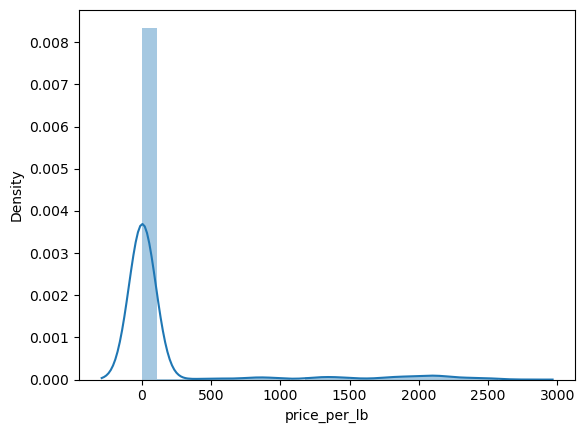

In [9]:
sns.distplot(df['price_per_lb'], bins=25) # Shows extreme values

In [10]:
# price of elver is distorting other species prices so we'll make another histogram exclusing elver
df_no_elver = df[df['species'] != 'Elver']

In [11]:
df_no_elver

,Unnamed: 0,year,species,port,county,weight_type,weight,value,number_harvesters,price_per_lb
0,0,2008,Bloodworms,Addison,Washington,Live Pounds,18934.19,208982.04,145,11.037284
1,1,2008,Bloodworms,Bar Harbor,Hancock,Live Pounds,1396.62,15276.99,31,10.938544
2,2,2008,Bloodworms,Bass Harbor,Hancock,Live Pounds,42.09,448.58,3,10.657638
3,3,2008,Bloodworms,Bath,Sagadahoc,Live Pounds,9408.14,101804.90,60,10.820938
4,4,2008,Bloodworms,Beals,Washington,Live Pounds,1760.18,18989.88,75,10.788601
...,...,...,...,...,...,...,...,...,...,...
4884,4884,2022,Tuna Atlantic Bluefin,South Bristol,Lincoln,Live Pounds,11543.13,57104.75,9,4.947077
4885,4885,2022,Tuna Atlantic Bluefin,Tenants Harbor,Knox,Live Pounds,7456.25,31216.52,3,4.186625
4886,4886,2022,Tuna Atlantic Bluefin,Wells,York,Live Pounds,14450.25,67219.96,10,4.651820
4887,4887,2022,Unidentified Catch,Other Maine,Not-Specified,Live Pounds,31154845.48,91045138.28,47,2.922343


/var/folders/h2/jmnpmtkj7wl_jwjm4dq4g_gr0000gn/T/ipykernel_58733/2345816772.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_no_elver['price_per_lb'], bins=35)


<Axes: xlabel='price_per_lb', ylabel='Density'>

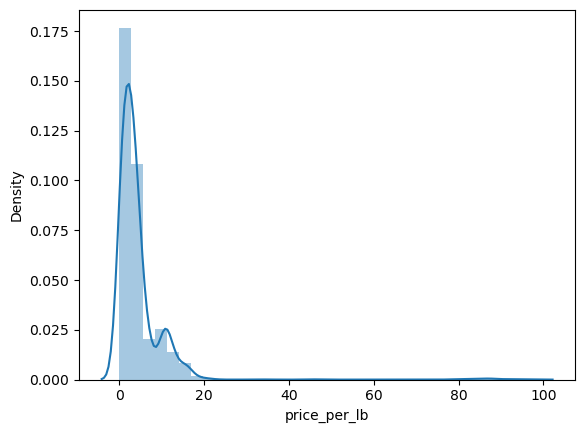

In [12]:
# histogram excluding elver
sns.distplot(df_no_elver['price_per_lb'], bins=35)

Price per pound doesn't seem to have any extreme values

## Data prep for regression analysis

Hypothesis: As the total weight of lobster harvested increases, the price per pound will decrease. 

In [13]:
# create a lobster data frame
lobster = df[df['species'] == 'Lobster American']

In [14]:
lobster

,Unnamed: 0,year,species,port,county,weight_type,weight,value,number_harvesters,price_per_lb
182,182,2008,Lobster American,Addison,Washington,Live Pounds,874072.35,2.811849e+06,80,3.216952
183,183,2008,Lobster American,Bailey Island,Cumberland,Live Pounds,1300961.05,4.380685e+06,100,3.367269
184,184,2008,Lobster American,Bar Harbor,Hancock,Live Pounds,749213.48,2.761140e+06,71,3.685385
185,185,2008,Lobster American,Bass Harbor,Hancock,Live Pounds,860515.00,3.237509e+06,89,3.762292
186,186,2008,Lobster American,Beals,Washington,Live Pounds,1463538.05,4.777284e+06,173,3.264202
...,...,...,...,...,...,...,...,...,...,...
4749,4749,2022,Lobster American,Trenton,Hancock,Live Pounds,223031.45,9.568708e+05,17,4.290295
4750,4750,2022,Lobster American,Vinalhaven,Knox,Live Pounds,6960663.70,3.023618e+07,188,4.343864
4751,4751,2022,Lobster American,Wells,York,Live Pounds,24907.00,1.156994e+05,6,4.645256
4752,4752,2022,Lobster American,Winter Harbor,Hancock,Live Pounds,1818154.05,6.541451e+06,57,3.597853


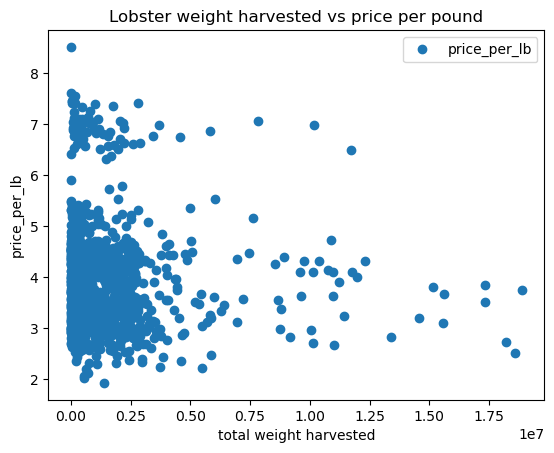

In [15]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

lobster.plot(x = 'weight', y='price_per_lb',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Lobster weight harvested vs price per pound')  
plt.xlabel('total weight harvested')  
plt.ylabel('price_per_lb')  
plt.show()

In [16]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = lobster['weight'].values.reshape(-1,1)
y = lobster['price_per_lb'].values.reshape(-1,1)

In [17]:
X

array([[ 874072.35],
       [1300961.05],
       [ 749213.48],
       ...,
       [  24907.  ],
       [1818154.05],
       [ 940215.45]])

In [18]:
y

array([[3.21695192],
       [3.36726875],
       [3.68538497],
       ...,
       [4.64525635],
       [3.59785325],
       [4.53728031]])

In [19]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Regression analysis

In [20]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [21]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [22]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

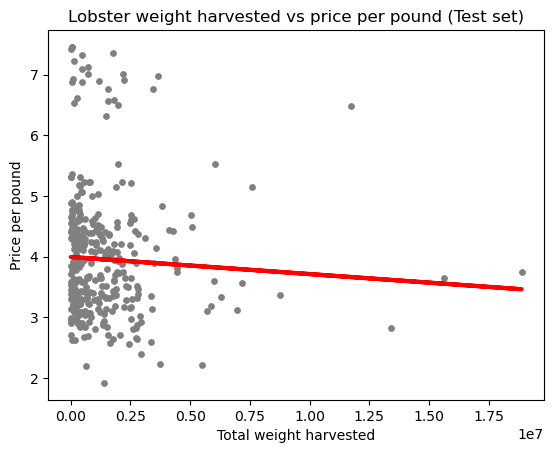

In [23]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Lobster weight harvested vs price per pound (Test set)')
plot_test.xlabel('Total weight harvested')
plot_test.ylabel('Price per pound')
plot_test.show()

In [24]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [25]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-2.81554314e-08]]
Mean squared error:  1.1628667624262692
R2 score:  -0.003215608821445004


In [26]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,6.915288,3.932220
1,4.290295,3.988488
2,3.392232,3.994570
3,5.230470,3.978516
4,3.093506,3.959788
5,4.172252,3.988056
6,4.887525,3.993989
7,4.375754,3.915824
8,3.882790,3.987047
9,2.972738,3.924035


## Conclusion

Based on the variability of data points along the regression line and the model summary statistics, this model didn't perform well. It has a very low r2 value, and the mean squared error is relatively high for the small spread in y-values. While total amount harvested is likely a factor to the price per pound of lobster, it isn't the only factor. Influences like demand from many different markets (both local and international) have a huge impact on price. Especially when the total amount harvested is relatively low, it doesn't seem to influence price per pound at all (hence the wide disparity in price for lower harvest amounts). 

In [27]:
# exporting clean data frame
df.to_csv(os.path.join(path, '02 Data','Prepared Data', 'landings_clean.csv'))

In [28]:
# exporting lobster data frame
lobster.to_csv(os.path.join(path, '02 Data','Prepared Data', 'lobster_clean.csv'))